# Shallow Water Waves Analysis Notebook

This notebook provides a detailed implementation and explanation of the wave height distribution model for shallow foreshores developed by **Battjes & Groenendijk (2000)**. It is structured to be both an interactive computational tool and an educational document.

### How to Use:
1.  **Install Prerequisites**: Follow the instructions in the next section to install the necessary libraries.
2.  **Follow the Notebook Sequentially**: Each section builds upon the last, explaining the theory and then providing the code that implements it.
3.  **Run the Code Cells**: Execute the code cells in order as you progress through the notebook.
4.  **Modify Inputs**: In the final section, change the input parameters to match your scenario and run the last cell to see the results.

## Prerequisites and Installation

Before running this notebook, you need to have the required Python libraries installed. You can install them using pip.

### Library Installation

Run the following command in your terminal or command prompt to install the necessary libraries:

In [1]:
# !pip install numpy scipy pandas notebook matplotlib

## 1. Theoretical Foundation: Beyond the Rayleigh Distribution

The statistical description of wave heights is fundamental to coastal engineering. In deep water, the distribution is well-described by the **Rayleigh distribution**. However, as waves move into shallow water, two key physical processes render the Rayleigh model invalid:

1.  **Nonlinear Shoaling**: As depth decreases, waves interact with the seabed, increasing their height and steepness. This enhances nonlinear effects, distorting the wave profile into a non-Gaussian shape with peaked crests and flat troughs.
2.  **Depth-Induced Breaking**: The water depth imposes a physical upper limit on wave height. The largest waves are forced to break, dissipating their energy. This truncates the upper tail of the wave height distribution, making extremely high waves far less probable than predicted by the unbounded Rayleigh model.

To address this, Battjes & Groenendijk (2000) proposed a model based on a more realistic physical hypothesis: the wave field on a shallow foreshore is a mixture of two distinct populations:
-   **Non-Breaking Waves**: Smaller waves whose heights are not significantly affected by the limited depth.
-   **Breaking/Broken Waves**: Larger waves whose heights are actively limited by the local depth.

### 1.1 The Composite Weibull Distribution (CWD)

The cumulative distribution function (CDF), $F(H)$, which gives the probability that a wave height is less than or equal to a value $H$, is defined by the CWD as (Battjes & Groenendijk, 2000):
$$ 
\Large F(H) = 
\begin{cases} 
F_1(H) = 1 - \exp\left[-\left(\frac{H}{H_1}\right)^{k_1}\right] & H \le H_{tr} \\
F_2(H) = 1 - \exp\left[-\left(\frac{H}{H_2}\right)^{k_2}\right] & H > H_{tr}
\end{cases}
$$ 

The parameters of this distribution were determined through extensive analysis of laboratory wave flume data (Battjes & Groenendijk, 2000). The **shape parameters $k_1$ and $k_2$** are fixed constants:

- $k_1 = 2.0$: This exponent confirms that the distribution for the smaller, non-breaking waves ($H \le H_{tr}$) is modeled as a Rayleigh distribution, which is a special case of the Weibull distribution where the shape parameter is 2 (Battjes & Groenendijk, 2000).
- $k_2 = 3.6$: This empirically derived shape parameter describes the much steeper decline in probability for the larger, depth-limited waves ($H > H_{tr}$). It reflects the physical reality that wave breaking strongly suppresses the occurrence of very high waves (Battjes & Groenendijk, 2000).

The remaining parameters—the scale parameters $H_1$ and $H_2$, and the transitional wave height $H_{tr}$—are not fixed but are determined by the local physical conditions. A continuity constraint is imposed such that $F_1(\tilde{H}_{tr}) = F_2(\tilde{H}_{tr})$ (Battjes & Groenendijk, 2000).

Because the shape parameters $k_1$ and $k_2$ are not equal, the derivative of the CDF, which is the probability density function (PDF), is discontinuous at the transition point $H_{tr}$. This is acknowledged as a modeling compromise; it is "physically not realistic but it is nevertheless accepted because all integral statistical properties of the wave heights are well behaved" (Battjes & Groenendijk, 2000).

This approach prioritizes the accurate prediction of integrated quantities used in engineering design (such as $H_{1/3}$ or $H_{1/10}$) over maintaining a mathematically smooth PDF.

### 1.2 Empirical Parameterization of Physical Variables

The CWD is grounded in physical reality through empirically derived formulas for its key parameters. These relationships, developed from wave flume experiments, connect the statistical model to measurable properties of the nearshore environment (Battjes & Groenendijk, 2000). Those properties are the following:

#### Free-surface Variance ($m_0$)

The variance of the **free-surface elevation, $m_0$**, represents the total energy in the sea state and is calculated from the spectral significant wave height, $H_{m0}$ using the standard definition (Battjes & Groenendijk, 2000), which is valid both deep and shallow waters:
$$ 
\Large m_0 = \left(\frac{H_{m0}}{4}\right)^2
$$ 

#### Root-Mean-Square Wave Height ($H_{rms}$)

The **root-mean-square wave height, $H_{rms}$**, is the fundamental scaling parameter for the entire distribution. In deep water, $H_{rms}$ is directly proportional to the standard deviation of the sea surface elevation ($\sqrt{m_0}$). However, in shallow waters, this relationship is modified by nonlinear effects. The empirically derived formula used in the model is (Battjes & Groenendijk, 2000):
$$ 
\Large \frac{H_{rms}}{\sqrt{m_0}} = 2.69 + 3.24 \frac{\sqrt{m_0}}{d}
$$ 

The parameter $\sqrt{m_0}/d$ is a dimensionless measure of the local wave intensity, or degree of saturation. The choice of the constant 2.69 is a deliberate and crucial feature of the model. For a purely linear, narrow-banded sea state, the theoretical relationship is $H_{rms} = \sqrt{8 \cdot m_0}$ (Battjes & Groenendijk, 2000). However, Battjes and Groenendijk (2000), citing field data analysis by Goda (1979), selected 2.69 as the deep-water limit (i.e., as $d \to \infty$) to better represent real, broad-banded ocean waves. This decision means that even in deep water, the $H_{rms}$ calculated by this model is approximately 5% lower than the theoretical Rayleigh value.

While this approach improves realism for broad-banded seas, it also causes the model's dimensional predictions to diverge from pure Rayleigh theory. This divergence was explicitly analyzed by Caires & Van Gent (2012), who demonstrated how **this parameterization causes the model to make predictions that do not smoothly converge to the Rayleigh values in deep water and can lead to physically inconsistent results, a behavior that necessitates a "capping" logic** described in the computational methodology section.

#### Transitional Wave Height ($H_{tr}$)

The **transitional wave height, $H_{tr}$**, represents the physical threshold that separates the two wave populations. It is conceptualized as a limiting height for non-breaking waves, influenced by both the local water depth and the steepness of the beach slope. The primary formula for $H_{tr}$ is (Battjes & Groenendijk, 2000):
$$ 
\Large H_{tr} = (0.35 + 5.8 \cdot \tan(\alpha)) \cdot d
$$ 

where $d$ is the local water depth and $\tan\alpha$ is the beach slope (e.g., for a 1:100 slope, $\tan\alpha = 0.01$). The inclusion of the slope term is physically significant. A steeper slope results in a higher value of $H_{tr}$, which implies that a smaller fraction of the waves are considered to be in the breaking-dominated regime. This accounts for the spatial lag inherent in the breaking process: on a steep slope, a wave may reach a depth where breaking is initiated but has not yet had sufficient time or distance to fully dissipate its energy and reduce its height (Battjes & Groenendijk, 2000).

## 2. Setup: Imports and Global Constants

First, we import the necessary Python libraries and define the global constants $k_1$ and $k_2$ that will be used throughout the calculations.

In [2]:
import numpy as np
from scipy.special import gammainc, gammaincc, gamma
from scipy.optimize import fsolve
import warnings
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Shape parameters for the Composite Weibull Distribution
K1 = 2.0  # Exponent for the first part (Rayleigh-shaped).
K2 = 3.6  # Exponent for the second part.

## 3. Core Mathematical Functions

The CWD model relies on special mathematical functions, primarily the incomplete gamma functions, to calculate the moments of the distribution (like the mean square wave height). 

#### Unnormalized Incomplete Gamma Functions
The **unnormalized lower incomplete gamma function**, $\gamma(a,x)$, and the **unnormalized upper incomplete gamma function**, $\Gamma(a,x)$, are defined as:

$$\Large \gamma(a, x) = \int_0^x t^{a-1} e^{-t} dt \quad \text{and} \quad \Gamma(a, x) = \int_x^{\infty} t^{a-1} e^{-t} dt$$

These are implemented below using functions from the `scipy.special` library, which provides numerically stable and accurate computations.

In [3]:
def incomplete_gamma_lower(a, x):
    """Computes the unnormalized lower incomplete gamma function γ(a, x)."""
    if a <= 0.0 or x < 0.0: return np.nan
    return gammainc(a, x) * gamma(a)

def incomplete_gamma_upper(a, x):
    """Computes the unnormalized upper incomplete gamma function Γ(a, x)."""
    if a <= 0.0 or x < 0.0: return np.nan
    return gammaincc(a, x) * gamma(a)

## 4. Numerical Solution of the CWD Governing Equations

The core numerical task is to determine the dimensionless scale parameters, $\tilde{H}_1 = H_1/H_{rms}$ and $\tilde{H}_2 = H_2/H_{rms}$, for a given $\tilde{H}_{tr} = H_{tr}/H_{rms}$. This is done by solving two coupled, non-linear equations:

1.  **Continuity Constraint ($F_2=0$)**: The probability must be continuous at $H_{tr}$.
    $$\Large F_2(\tilde{H}_1, \tilde{H}_2) = \left( \frac{\tilde{H}_{tr}}{\tilde{H}_1} \right)^{k_1} - \left( \frac{\tilde{H}_{tr}}{\tilde{H}_2} \right)^{k_2} = 0$$

2.  **Normalization Constraint ($F_1=0$)**: The mean square of the normalized wave heights must equal one.
    $$ \Large F_1(\tilde{H}_1, \tilde{H}_2) = \sqrt{\tilde{H}_1^2 \cdot \gamma\left(1+\frac{2}{k_1}, \left(\frac{\tilde{H}_{tr}}{\tilde{H}_1}\right)^{k_1}\right) + \tilde{H}_2^2  \cdot \Gamma\left(1+\frac{2}{k_2}, \left(\frac{\tilde{H}_{tr}}{\tilde{H}_2}\right)^{k_2}\right)} - 1 = 0$$

This system is solved using a **Newton-Raphson method** for systems. Given an initial guess $(\tilde{H}_1^{(i)}, \tilde{H}_2^{(i)})$, the next iteration is found by solving the linear system:

$$\Large J(\tilde{H}_1^{(i)}, \tilde{H}_2^{(i)}) \begin{pmatrix} \Delta \tilde{H}_1 \\ \Delta \tilde{H}_2 \end{pmatrix} = - \begin{pmatrix} F_1(\tilde{H}_1^{(i)}, \tilde{H}_2^{(i)}) \\ F_2(\tilde{H}_1^{(i)}, \tilde{H}_2^{(i)}) \end{pmatrix}$$

where $J$ is the Jacobian matrix of partial derivatives:

$$\Large J = \begin{pmatrix} \frac{\partial F_1}{\partial \tilde{H}_1} & \frac{\partial F_1}{\partial \tilde{H}_2} \\ \frac{\partial F_2}{\partial \tilde{H}_1} & \frac{\partial F_2}{\partial \tilde{H}_2} \end{pmatrix}$$

The solution is updated as:

$$\Large \tilde{H}_1^{(i+1)} = \tilde{H}_1^{(i)} + \Delta \tilde{H}_1 \quad \text{and} \quad \tilde{H}_2^{(i+1)} = \tilde{H}_2^{(i)} + \Delta \tilde{H}_2$$

This process is repeated until the values of $F_1$ and $F_2$ are close to zero. The `scipy.optimize.fsolve` function handles this iterative process internally.

In [4]:
def equations(p, Htr_Hrms):
    """Defines the system of non-linear equations to be solved."""
    H1_Hrms, H2_Hrms = p
    if H1_Hrms <= 0 or H2_Hrms <= 0: return [1e9, 1e9]
    
    # Equation 1 (Normalization Constraint, rearranged)
    arg1 = np.power(Htr_Hrms / H1_Hrms, K1)
    arg2 = np.power(Htr_Hrms / H2_Hrms, K2)
    term1 = H1_Hrms**2 * incomplete_gamma_lower(2.0 / K1 + 1.0, arg1)
    term2 = H2_Hrms**2 * incomplete_gamma_upper(2.0 / K2 + 1.0, arg2)
    f1 = np.sqrt(max(0.0, term1 + term2)) - 1.0
    
    # Equation 2 (Continuity Constraint, rearranged)
    f2 = np.power(Htr_Hrms / H1_Hrms, K1) - np.power(Htr_Hrms / H2_Hrms, K2)
    return (f1, f2)

def get_initial_guesses(Htr_Hrms):
    """Provides empirical initial guesses for H1_Hrms and H2_Hrms."""
    H1_initial = 0.9552427998926 / (1.0 - 0.992405988921401 * np.exp(-1.42537392576977 * Htr_Hrms))
    H2_initial = 1.054085273232950 + 0.9369023639428842 * np.power(Htr_Hrms, 2.980718327103574) / \
                 (np.power(2.549022900471753, 2.980718327103574) + np.power(Htr_Hrms, 2.980718327103574))
    return (H1_initial, H2_initial)

def solve_system(Htr_Hrms):
    """Solves for H1_Hrms and H2_Hrms using scipy's fsolve."""
    initial_guesses = get_initial_guesses(Htr_Hrms)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        solution, infodict, ier, mesg = fsolve(equations, initial_guesses, args=(Htr_Hrms), full_output=True)
    if ier == 1:
        return solution[0], solution[1]
    else:
        print(f"Solver failed to converge for Htr_Hrms = {Htr_Hrms}: {mesg}")
        return None, None

## 5. Calculation of Statistical Wave Heights

Once $\tilde{H}_1$ and $\tilde{H}_2$ are known, we can calculate key statistical wave heights.

#### Wave Height with $1/N$ Exceedance Probability ($\tilde{H}_N$)
This is the wave height, $H$, such that the probability of a wave exceeding it is $1/N$. 
$$ \Large \tilde{H}_N = 
\begin{cases} 
\tilde{H}_1 \cdot (\ln N)^{1/k_1} & \text{if candidate} < \tilde{H}_{tr} \\
\tilde{H}_2 \cdot (\ln N)^{1/k_2} & \text{if candidate} \ge \tilde{H}_{tr}
\end{cases} $$

#### Mean of the Highest $1/N$-part of Wave Heights ($\tilde{H}_{1/N}$)
This represents the average height of the highest $N$-th fraction of waves (e.g., $H_{1/3}$ for significant wave height). The calculation depends on whether $\tilde{H}_N$ falls within the first or second part of the CWD.

**Case 1: $\tilde{H}_N < \tilde{H}_{tr}$** (Integration spans both parts of the CWD)
$$\Large \tilde{H}_{1/N} = N \cdot \tilde{H}_1 \cdot \left[ \Gamma\left(\frac{1}{k_1}+1, \ln N\right) - \Gamma\left(\frac{1}{k_1}+1, \left(\frac{\tilde{H}_{tr}}{\tilde{H}_1}\right)^{k_1}\right) \right] + N \cdot \tilde{H}_2 \cdot  \Gamma\left(\frac{1}{k_2}+1, \left(\frac{\tilde{H}_{tr}}{\tilde{H}_2}\right)^{k_2}\right)$$

**Case 2: $\tilde{H}_N \ge \tilde{H}_{tr}$** (Integration is only over the second part of the CWD)
$$\Large \tilde{H}_{1/N} = N \cdot \tilde{H}_2 \cdot \Gamma\left(\frac{1}{k_2}+1, \ln N\right)$$

In [5]:
def calculate_HN(N, H1, H2, Htr):
    """Calculates HN (wave height with 1/N exceedance probability)."""
    if N <= 1.0 or H1 <= 0.0 or H2 <= 0.0:
        raise ValueError("Invalid arguments for calculate_HN.")
    HN_candidate1 = H1 * np.power(np.log(N), 1.0 / K1)
    return HN_candidate1 if HN_candidate1 < Htr else H2 * np.power(np.log(N), 1.0 / K2)

def calculate_H1N(N_val, H1, H2, Htr):
    """Calculates the mean of the highest 1/N-part of wave heights (H1/N)."""
    if N_val <= 1.0 or H1 <= 0.0 or H2 <= 0.0:
        raise ValueError("Invalid arguments for calculate_H1N.")
    H_N_val = calculate_HN(N_val, H1, H2, Htr)
    term1_x_ln_Nval = np.log(N_val)
    term2_a = 1.0 / K2 + 1.0
    if H_N_val < Htr:
        term1_a = 1.0 / K1 + 1.0
        term1_x_HtrH1 = np.power(Htr / H1, K1)
        term2_x_HtrH2 = np.power(Htr / H2, K2)
        gamma1 = incomplete_gamma_upper(term1_a, term1_x_ln_Nval) - incomplete_gamma_upper(term1_a, term1_x_HtrH1)
        gamma2 = incomplete_gamma_upper(term2_a, term2_x_HtrH2)
        return N_val * (H1 * gamma1 + H2 * gamma2)
    else:
        return N_val * H2 * incomplete_gamma_upper(term2_a, term1_x_ln_Nval)

## 6. Plot of Dimensionless Wave-Height Ratios

We iterate through a range of $\tilde{H}_{tr}$ values, solve for the parameters at each step, calculate the corresponding $\tilde{H}_{1/N}$ values, and then generate the final plot.

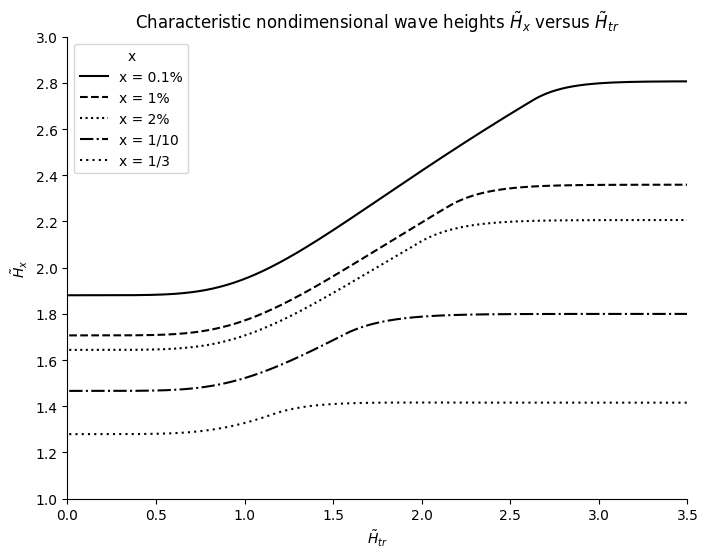

In [6]:
# Define the range for the x-axis
Htr_tilde_range = np.arange(0.01, 3.51, 0.01)

# Define the N values for the different curves (x = 1/N)
N_map = {
    'x = 0.1%': 1000,
    'x = 1%': 100,
    'x = 2%': 50,
    'x = 1/10': 10,
    'x = 1/3': 3
}

# Dictionary to store the results
results_plot = {label: [] for label in N_map.keys()}

# Main calculation loop for the plot
for htr_t in Htr_tilde_range:
    H1_t, H2_t = solve_system(htr_t)
    for label, n_val in N_map.items():
        if np.isnan(H1_t) or np.isnan(H2_t):
             results_plot[label].append(np.nan)
        else:
            h1n_t = calculate_H1N(float(n_val), H1_t, H2_t, htr_t)
            results_plot[label].append(h1n_t)

# --- Matplotlib Plot Generation ---

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define line styles to match the image
line_styles = {
    'x = 0.1%': 'solid',
    'x = 1%': 'dashed',
    'x = 2%': 'dotted',
    'x = 1/10': 'dashdot',
    'x = 1/3': (0, (1, 2)) # Custom loosely dotted style
}

for label, y_values in results_plot.items():
    ax.plot(Htr_tilde_range, y_values, linestyle=line_styles[label], color='black', label=label)

# Update layout to match the provided plot
ax.set_xlabel('$\~{H}_{tr}$')
ax.set_ylabel('$\~{H}_{x}$')
ax.set_xlim(0, 3.5)
ax.set_ylim(1.0, 3.0)
ax.set_xticks(np.arange(0, 4.0, 0.5))
ax.set_yticks(np.arange(1.0, 3.2, 0.2))
ax.legend(title='x')
ax.grid(False) # The original plot has no grid
ax.set_title('Characteristic nondimensional wave heights $\~{H}_x$ versus $\~{H}_{tr}$')

# Ensure the plot has a white background and black axes like the original
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')

plt.show()

## 7. Main Analysis Workflow

The final function, `perform_wave_analysis`, integrates all the previous steps. It takes the physical inputs, calculates the intermediate parameters, and directs the workflow either to the CWD solver or the Rayleigh bypass based on the value of $\tilde{H}_{tr}$. It also applies the physical consistency capping to the final results.

In [7]:
def perform_wave_analysis(Hm0, d, slopeM):
    """Performs the full wave analysis and returns a dictionary of results."""
    results = {}
    results['Hm0'], results['d'], results['slopeM'] = Hm0, d, slopeM
    
    # Calculate intermediate parameters
    results['m0'] = (Hm0 / 4.0)**2
    sqrt_m0 = np.sqrt(results['m0'])
    results['Hrms'] = (2.69 + 3.24 * sqrt_m0 / d) * sqrt_m0
    results['tanAlpha'] = 1.0 / slopeM
    results['Htr_dim'] = (0.35 + 5.8 * results['tanAlpha']) * d
    results['Htr_tilde'] = results['Htr_dim'] / results['Hrms'] if results['Hrms'] > 0 else 0.0

    # Deep-Water Bypass Logic
    if results['Htr_tilde'] > 2.75:
        results['distribution_type'] = "Rayleigh"
        results['H1_Hrms'], results['H2_Hrms'], results['H1_dim'], results['H2_dim'] = np.nan, np.nan, np.nan, np.nan
        # Use theoretically exact H(1/N)/Hm0 ratios for a pure Rayleigh distribution.
        results['H1_3_dim']    = 1.001075736951740 * Hm0
        results['H1_10_dim']   = 1.272734273369137 * Hm0
        results['H1_50_dim']   = 1.560113379974762 * Hm0
        results['H1_100_dim']  = 1.668233372358517 * Hm0
        results['H1_250_dim']  = 1.801017222497626 * Hm0
        results['H1_1000_dim'] = 1.984835590575388 * Hm0
        for n in [3, 10, 50, 100, 250, 1000]:
            results[f'HN_{n}_dim'] = results['Hrms'] * np.sqrt(np.log(float(n)))
    else:
        # CWD Solution
        results['distribution_type'] = "B&G"
        H1_Hrms, H2_Hrms = solve_system(results['Htr_tilde'])
        if H1_Hrms is None: return None
        results['H1_Hrms'], results['H2_Hrms'] = H1_Hrms, H2_Hrms
        
        for n in [3, 10, 50, 100, 250, 1000]:
            results[f'H1_{n}_Hrms'] = calculate_H1N(float(n), H1_Hrms, H2_Hrms, results['Htr_tilde'])
            hn_tilde = calculate_HN(float(n), results['H1_Hrms'], results['H2_Hrms'], results['Htr_tilde'])
            results[f'HN_{n}_dim'] = hn_tilde * results['Hrms']
        
        results['H1_dim'] = results['H1_Hrms'] * results['Hrms']
        results['H2_dim'] = results['H2_Hrms'] * results['Hrms']
        results['H1_3_dim'] = results['H1_3_Hrms'] * results['Hrms']
        results['H1_10_dim'] = results['H1_10_Hrms'] * results['Hrms']
        results['H1_50_dim'] = results['H1_50_Hrms'] * results['Hrms']
        results['H1_100_dim'] = results['H1_100_Hrms'] * results['Hrms']
        results['H1_250_dim'] = results['H1_250_Hrms'] * results['Hrms']
        results['H1_1000_dim'] = results['H1_1000_Hrms'] * results['Hrms']

        # Physical Consistency Capping
        # Use theoretically exact H(1/N)/Hm0 ratios for a pure Rayleigh distribution.
        results['H1_3_dim']    = min(results['H1_3_dim'],    1.001075736951740 * Hm0)
        results['H1_10_dim']   = min(results['H1_10_dim'],   1.272734273369137 * Hm0)
        results['H1_50_dim']   = min(results['H1_50_dim'],   1.560113379974762 * Hm0)
        results['H1_100_dim']  = min(results['H1_100_dim'],  1.668233372358517 * Hm0)
        results['H1_250_dim']  = min(results['H1_250_dim'],  1.801017222497626 * Hm0)
        results['H1_1000_dim'] = min(results['H1_1000_dim'], 1.984835590575388 * Hm0)
    
    # Back-calculate dimensionless ratios from potentially capped dimensional values for accurate reporting
    if results['Hrms'] > 0:
        # This step is crucial and ensures consistency with the C++ version
        results['H1_3_Hrms'] = results['H1_3_dim'] / results['Hrms']
        results['H1_10_Hrms'] = results['H1_10_dim'] / results['Hrms']
        results['H1_50_Hrms'] = results['H1_50_dim'] / results['Hrms']
        results['H1_100_Hrms'] = results['H1_100_dim'] / results['Hrms']
        results['H1_250_Hrms'] = results['H1_250_dim'] / results['Hrms']
        results['H1_1000_Hrms'] = results['H1_1000_dim'] / results['Hrms']

    # Calculate diagnostic ratios using the final, consistent dimensionless values
    if results['H1_3_Hrms'] > 0:
        results['ratio_1_10_div_1_3'] = results['H1_10_Hrms'] / results['H1_3_Hrms']
        results['ratio_1_50_div_1_3'] = results['H1_50_Hrms'] / results['H1_3_Hrms']
        results['ratio_1_100_div_1_3'] = results['H1_100_Hrms'] / results['H1_3_Hrms']
        results['ratio_1_250_div_1_3'] = results['H1_250_Hrms'] / results['H1_3_Hrms']
        results['ratio_1_1000_div_1_3'] = results['H1_1000_Hrms'] / results['H1_3_Hrms']
    else:
        for n in [10, 50, 100, 250, 1000]:
            results[f'ratio_1_{n}_div_1_3'] = 0.0
            
    return results

## 8. Execution and Results

This is the interactive part of the notebook. Modify the input parameters in the first cell, then run the second cell to perform the analysis and display the results in formatted tables.

In [8]:
# ==============================================================================
# CELL: INPUTS
# (Modify the values in this cell and re-run it to test new scenarios)
# ==============================================================================

Hm0_input = 2.5      # local significant spectral wave height (m)
d_input = 5.0        # local water depth (m)
slopeM_input = 100.0 # beach slope (1:m)

In [9]:
# ==============================================================================
# CELL: CALCULATION AND DISPLAY
# (Run this cell to perform the analysis and see the results as tables)
# ==============================================================================

# Perform the analysis
final_results = perform_wave_analysis(Hm0_input, d_input, slopeM_input)

if final_results:
    # --- Styling Configuration ---
    styles = [
        dict(selector="caption", props=[("caption-side", "top"),
                                         ("font-size", "1.2em"),
                                         ("font-weight", "bold"),
                                         ("text-align", "left")])
    ]
    
    # --- Table 1: Merged Parameters ---
    params_data = {
        'Value': [
            f"{final_results['Hm0']:.4f}",
            f"{final_results['d']:.4f}",
            f"{final_results['slopeM']:.4f} (tan(alpha) = {final_results['tanAlpha']:.4f})",
            final_results['distribution_type'],
            f"{final_results['Hrms']:.4f}",
            f"{final_results['m0']:.4f}",
            f"{final_results['Htr_tilde']:.4f}",
            f"{final_results['Htr_dim']:.4f}"
        ]
    }
    params_index = [
        'Input: Hm0 (m)', 'Input: d (m)', 'Input: Beach slope (m)', 'Distribution Used',
        'Calculated: Hrms (m)', 'Calculated: m0 (m^2)', 'Calculated: Htr / Hrms', 'Calculated: Htr (m)'
    ]
    params_df = pd.DataFrame(params_data, index=params_index)
    display(params_df.style.set_caption("Input and Calculated Parameters").set_table_styles(styles))

    # --- Table 2: Merged Wave Height Analysis ---
    analysis_index = ['H1', 'H2', 'H1/3', 'H1/10', 'H1/50', 'H1/100', 'H1/250', 'H1/1000']
    analysis_data = {
        'Dimensionless (H/Hrms)': [
            final_results.get('H1_Hrms'),
            final_results.get('H2_Hrms'),
            final_results.get('H1_3_Hrms'),
            final_results.get('H1_10_Hrms'),
            final_results.get('H1_50_Hrms'),
            final_results.get('H1_100_Hrms'),
            final_results.get('H1_250_Hrms'),
            final_results.get('H1_1000_Hrms')
        ],
        'Dimensional (m)': [
            final_results.get('H1_dim'),
            final_results.get('H2_dim'),
            final_results.get('H1_3_dim'),
            final_results.get('H1_10_dim'),
            final_results.get('H1_50_dim'),
            final_results.get('H1_100_dim'),
            final_results.get('H1_250_dim'),
            final_results.get('H1_1000_dim')
        ],
        'Diagnostic Ratio ((H1/N)/(H1/3))': [
            np.nan, # Not applicable for H1
            np.nan, # Not applicable for H2
            np.nan, # Not applicable for H1/3
            final_results.get('ratio_1_10_div_1_3'),
            final_results.get('ratio_1_50_div_1_3'),
            final_results.get('ratio_1_100_div_1_3'),
            final_results.get('ratio_1_250_div_1_3'),
            final_results.get('ratio_1_1000_div_1_3')
        ]
    }
    analysis_df = pd.DataFrame(analysis_data, index=analysis_index)
    display(analysis_df.style.format('{:.4f}', na_rep='-').set_caption("Wave Height Analysis").set_table_styles(styles))

else:
    print("Calculation failed. Please check the input values and solver messages.")

,Value
Input: Hm0 (m),2.5000
Input: d (m),5.0000
Input: Beach slope (m),100.0000 (tan(alpha) = 0.0100)
Distribution Used,B&G
Calculated: Hrms (m),1.9344
Calculated: m0 (m^2),0.3906
Calculated: Htr / Hrms,1.0546
Calculated: Htr (m),2.0400


,Dimensionless (H/Hrms),Dimensional (m),Diagnostic Ratio ((H1/N)/(H1/3))
H1,1.1567,2.2375,-
H2,1.1102,2.1475,-
H1/3,1.2938,2.5027,-
H1/10,1.5354,2.9701,1.1868
H1/50,1.7213,3.3296,1.3304
H1/100,1.7870,3.4567,1.3812
H1/250,1.8650,3.6077,1.4415
H1/1000,1.9689,3.8086,1.5218


## 9. Graphical Analysis

Visualizing the results can provide a more intuitive understanding of the wave height distribution. The following plots show the calculated statistical wave heights and the underlying probability density function.

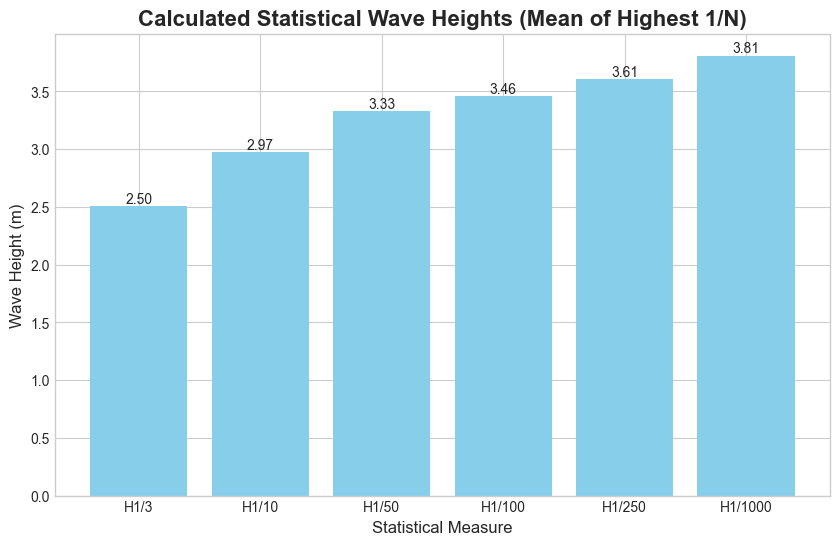

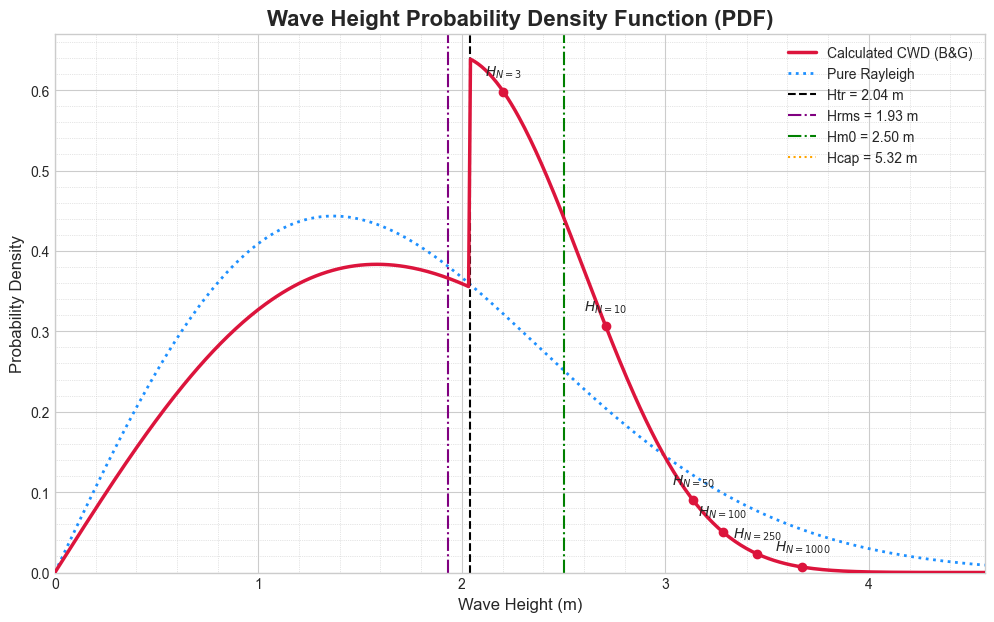

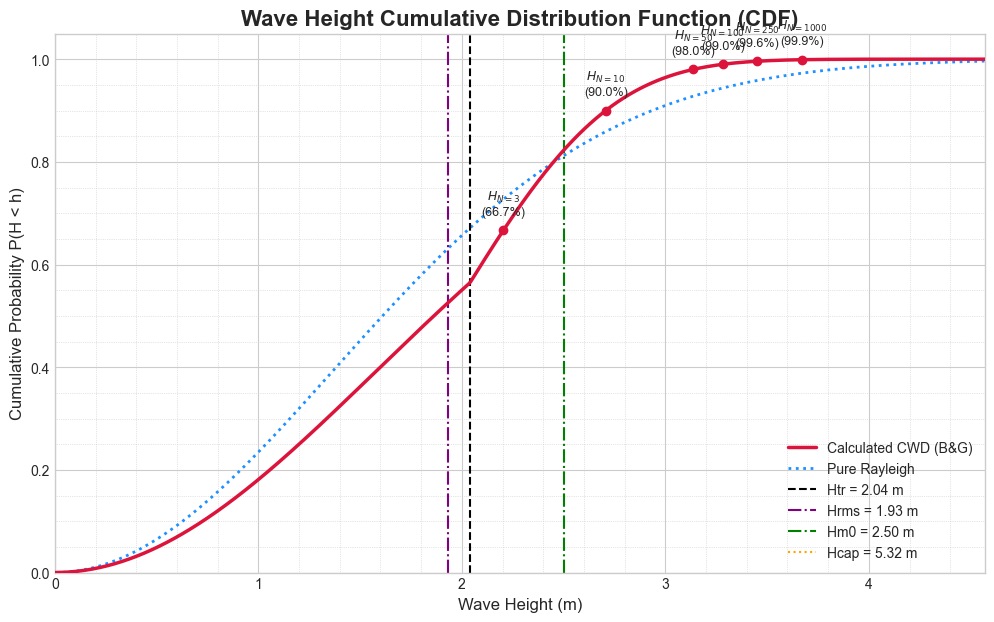

In [10]:
if final_results:
    # --- Plotting Data Setup ---
    h1n_labels = ['H1/3', 'H1/10', 'H1/50', 'H1/100', 'H1/250', 'H1/1000']
    h1n_values = [
        final_results.get('H1_3_dim'), final_results.get('H1_10_dim'),
        final_results.get('H1_50_dim'), final_results.get('H1_100_dim'),
        final_results.get('H1_250_dim'), final_results.get('H1_1000_dim')
    ]
    n_values = [3, 10, 50, 100, 250, 1000]
    
    # Get HN values for plotting points on curves
    hn_labels = [f'$H_{{N={n}}}$' for n in n_values]
    hn_values = [final_results.get(f'HN_{n}_dim') for n in n_values]
    probabilities = [1 - 1/n for n in n_values]
    Hcap = final_results['Hrms'] * 2.75

    # --- Plot 1: Bar Chart of Dimensional Wave Heights ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    bars = ax1.bar(h1n_labels, h1n_values, color='skyblue')
    ax1.set_title('Calculated Statistical Wave Heights (Mean of Highest 1/N)', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Wave Height (m)', fontsize=12)
    ax1.set_xlabel('Statistical Measure', fontsize=12)
    ax1.bar_label(bars, fmt='%.2f')
    plt.show()

    # --- PDF and CDF Function Definitions ---
    def rayleigh_pdf(H, Hrms):
        return (2 * H / Hrms**2) * np.exp(-(H / Hrms)**2)
    def cwd_pdf(H, H1, H2, Htr, K1, K2):
        pdf_vals = np.zeros_like(H)
        mask1 = H <= Htr
        mask2 = H > Htr
        pdf_vals[mask1] = (K1 / H1) * (H[mask1] / H1)**(K1 - 1) * np.exp(-(H[mask1] / H1)**K1)
        pdf_vals[mask2] = (K2 / H2) * (H[mask2] / H2)**(K2 - 1) * np.exp(-(H[mask2] / H2)**K2)
        return pdf_vals
    def rayleigh_cdf(H, Hrms):
        return 1 - np.exp(-(H / Hrms)**2)
    def cwd_cdf(H, H1, H2, Htr, K1, K2):
        cdf_vals = np.zeros_like(H)
        mask1 = H <= Htr
        mask2 = H > Htr
        cdf_vals[mask1] = 1 - np.exp(-(H[mask1] / H1)**K1)
        cdf_vals[mask2] = 1 - np.exp(-(H[mask2] / H2)**K2)
        return cdf_vals

    # --- Plot 2: Probability Density Function (PDF) with Points ---
    fig2, ax2 = plt.subplots(figsize=(12, 7))
    H_range = np.linspace(0, max(h1n_values) * 1.2, 500)

    if final_results['distribution_type'] == 'B&G':
        pdf_calculated = cwd_pdf(H_range, final_results['H1_dim'], final_results['H2_dim'], final_results['Htr_dim'], K1, K2)
        pdf_points = cwd_pdf(np.array(hn_values), final_results['H1_dim'], final_results['H2_dim'], final_results['Htr_dim'], K1, K2)
        ax2.plot(H_range, pdf_calculated, label=f'Calculated CWD (B&G)', color='crimson', linewidth=2.5, zorder=10)
    else: # Rayleigh case
        pdf_calculated = rayleigh_pdf(H_range, final_results['Hrms'])
        pdf_points = rayleigh_pdf(np.array(hn_values), final_results['Hrms'])
        ax2.plot(H_range, pdf_calculated, label='Calculated (Rayleigh)', color='crimson', linewidth=2.5, zorder=10)

    pdf_rayleigh_pure = rayleigh_pdf(H_range, final_results['Hrms'])
    ax2.plot(H_range, pdf_rayleigh_pure, label=f'Pure Rayleigh', color='dodgerblue', linestyle=':', linewidth=2)
    ax2.scatter(hn_values, pdf_points, color='crimson', zorder=11)
    for i, label in enumerate(hn_labels):
        ax2.text(hn_values[i], pdf_points[i] + 0.02, label, ha='center', zorder=12)

    # Add vertical lines for key parameters
    ax2.axvline(x=final_results['Htr_dim'], color='black', linestyle='--', label=f'Htr = {final_results["Htr_dim"]:.2f} m')
    ax2.axvline(x=final_results['Hrms'], color='purple', linestyle='-.', label=f'Hrms = {final_results["Hrms"]:.2f} m')
    ax2.axvline(x=final_results['Hm0'], color='green', linestyle='-.', label=f'Hm0 = {final_results["Hm0"]:.2f} m')
    ax2.axvline(x=Hcap, color='orange', linestyle=':', label=f'Hcap = {Hcap:.2f} m')

    ax2.set_title('Wave Height Probability Density Function (PDF)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Wave Height (m)', fontsize=12)
    ax2.set_ylabel('Probability Density', fontsize=12)
    ax2.legend()
    ax2.set_xlim(0, H_range.max())
    ax2.set_ylim(0)
    ax2.minorticks_on()
    ax2.grid(True, which='major', linestyle='-', linewidth='0.8')
    ax2.grid(True, which='minor', linestyle=':', linewidth='0.5')
    plt.show()
    
    # --- Plot 3: Cumulative Distribution Function (CDF) with Points ---
    fig3, ax3 = plt.subplots(figsize=(12, 7))
    
    if final_results['distribution_type'] == 'B&G':
        cdf_calculated = cwd_cdf(H_range, final_results['H1_dim'], final_results['H2_dim'], final_results['Htr_dim'], K1, K2)
        ax3.plot(H_range, cdf_calculated, label=f'Calculated CWD (B&G)', color='crimson', linewidth=2.5, zorder=10)
    else: # Rayleigh case
        cdf_calculated = rayleigh_cdf(H_range, final_results['Hrms'])
        ax3.plot(H_range, cdf_calculated, label='Calculated (Rayleigh)', color='crimson', linewidth=2.5, zorder=10)
    
    cdf_rayleigh_pure = rayleigh_cdf(H_range, final_results['Hrms'])
    ax3.plot(H_range, cdf_rayleigh_pure, label=f'Pure Rayleigh', color='dodgerblue', linestyle=':', linewidth=2)
    ax3.scatter(hn_values, probabilities, color='crimson', zorder=11)
    for i, label in enumerate(hn_labels):
        ax3.text(hn_values[i], probabilities[i] + 0.03, f'{label}\n({probabilities[i]:.1%})', ha='center', fontsize=9, zorder=12)
    
    # Add vertical lines for key parameters
    ax3.axvline(x=final_results['Htr_dim'], color='black', linestyle='--', label=f'Htr = {final_results["Htr_dim"]:.2f} m')
    ax3.axvline(x=final_results['Hrms'], color='purple', linestyle='-.', label=f'Hrms = {final_results["Hrms"]:.2f} m')
    ax3.axvline(x=final_results['Hm0'], color='green', linestyle='-.', label=f'Hm0 = {final_results["Hm0"]:.2f} m')
    ax3.axvline(x=Hcap, color='orange', linestyle=':', label=f'Hcap = {Hcap:.2f} m')

    ax3.set_title('Wave Height Cumulative Distribution Function (CDF)', fontsize=16, fontweight='bold')
    ax3.set_xlabel('Wave Height (m)', fontsize=12)
    ax3.set_ylabel('Cumulative Probability P(H < h)', fontsize=12)
    ax3.legend(loc='lower right')
    ax3.set_xlim(0, H_range.max())
    ax3.set_ylim(0, 1.05)
    ax3.minorticks_on()
    ax3.grid(True, which='major', linestyle='-', linewidth='0.8')
    ax3.grid(True, which='minor', linestyle=':', linewidth='0.5')
    plt.show()

## 10. Bibliography

- **Battjes, J. A., & Groenendijk, H. W. (2000).** Wave height distributions on shallow foreshores. *Coastal Engineering*, 40(3), 161-182.
- **Caires, S., & Van Gent, M. R. A. (2012).** Wave height distribution in constant and finite depths. *Coastal Engineering Proceedings*, 1(33), 15.
- **Goda, Y. (1979).** A review on statistical interpretation of wave data. *Report of the Port and Harbour Research Institute, Japan*, 18(1), 5-32.
- **Groenendijk, H. W. (1998).** *Shallow foreshore wave height statistics*. M.Sc.-thesis, Delft University of Technology, Department of Civil Engineering, Section Fluid Mechanics, The Netherlands.
- **Groenendijk, H. W., & Van Gent, M. R. A. (1998).** *Shallow foreshore wave height statistics; A predictive model for the probability of exceedance of wave heights*. Technical Report H3351, WL | delft hydraulics, The Netherlands.
- **Hasselmann, K., Barnett, T. P., Bouws, E., Carlson, H., Cartwright, D. D. E., Enke, K.,... & Walden, H. (1973).** *Measurements of Wind-Wave Growth and Swell Decay during the Joint North Sea Wave Project (JONSWAP)*. Ergnzungsheft zur Deutschen Hydrographischen Zeitschrift Reihe, A (8), 95.
- **James, J. P., & Panchang, V. (2022).** Investigation of Wave Height Distributions and Characteristic Wave Periods in Coastal Environments. *Journal of Geophysical Research: Oceans*, 127, e2021JC018144.
- **Karmpadakis, I., Swan, C., & Christou, M. (2020).** Assessment of wave height distributions using an extensive field database. *Coastal Engineering*, 157, 103630.
- **Karmpadakis, I., Swan, C., & Christou, M. (2022).** A new wave height distribution for intermediate and shallow water depths. *Coastal Engineering*, 175, 104130.
- **Klopman, G. (1996).** *Extreme wave heights in shallow water*. WL | delft hydraulics, Report H2486, The Netherlands.
- **Klopman, G., & Stive, M. J. F. (1989).** *Extreme waves and wave loading in shallow water*. Paper presented at the E&P Forum Workshop in Paris, Delft Hydraulics, The Netherlands.
- **Longuet-Higgins, M. S. (1952).** On the statistical distribution of heights of sea waves. *Journal of Marine Research*, 11(3), 245-266.
- **Longuet-Higgins, M. S. (1980).** On the distribution of the heights of sea waves: Some effects of nonlinearity and finite band width. *Journal of Geophysical Research*, 85(C3), 1519-1523.
- **Naess, A. (1985).** On the distribution of crest to trough wave heights. *Ocean Engineering*, 12(3), 221-234.
- **Tayfun, M. A. (1990).** Distribution of large wave heights. *Journal of Waterway, Port, Coastal, and Ocean Engineering*, 116(6), 686-707.
- **Thornton, E. B., & Guza, R. T. (1982).** Energy saturation and phase speeds measured on a natural beach. *Journal of Geophysical Research*, 87(C12), 9499-9508.
- **Thornton, E. B., & Guza, R. T. (1983).** Transformation of wave height distribution. *Journal of Geophysical Research*, 88(C10), 5925-938.